In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score

### This below dataset contains about 10 years of daily weather observations from many locations across Australia & based on this data we have to predict that whther it will rain or not tomorrow?

In [286]:
#Loading the training dataset
w_train = pd.read_csv('weatherAUS_train.csv')

In [287]:
#Overview of training dataset
w_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2013-07-22,Sydney,8.7,17.2,0.0,3.8,9.9,WNW,54.0,WNW,...,54.0,28.0,1019.4,1016.3,2.0,2.0,12.2,16.6,No,0
1,2015-02-28,Sale,15.4,25.7,0.0,NaN,NaN,W,67.0,NNE,...,84.0,66.0,1008.1,1005.1,8.0,8.0,18.8,24.3,No,1
2,2009-11-18,PerthAirport,15.2,22.2,7.2,5.2,3.3,NW,78.0,NW,...,68.0,91.0,1001.5,1000.1,7.0,8.0,20.1,16.5,Yes,1
3,2014-02-19,Richmond,19.9,26.4,0.0,2.8,NaN,SW,24.0,NNE,...,97.0,97.0,1004.6,1002.1,NaN,NaN,22.6,22.3,No,1
4,2015-10-04,Wollongong,19.3,32.9,0.0,NaN,NaN,W,48.0,NNW,...,46.0,15.0,1022.8,1020.7,NaN,NaN,22.1,32.6,No,0


Questions:
1) # of observations & columns in dataset?

2) Type of columns & their description?

3) To check for null/missing values & duplicates?

In [288]:
#get the total no of observations
len(w_train)

101822

In [289]:
#to know the column datatypes
w_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101822 entries, 0 to 101821
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           101822 non-null  object 
 1   Location       101822 non-null  object 
 2   MinTemp        100795 non-null  float64
 3   MaxTemp        100947 non-null  float64
 4   Rainfall       99522 non-null   float64
 5   Evaporation    57933 non-null   float64
 6   Sunshine       53022 non-null   float64
 7   WindGustDir    94504 non-null   object 
 8   WindGustSpeed  94550 non-null   float64
 9   WindDir9am     94431 non-null   object 
 10  WindDir3pm     98836 non-null   object 
 11  WindSpeed9am   100550 non-null  float64
 12  WindSpeed3pm   99663 non-null   float64
 13  Humidity9am    99968 non-null   float64
 14  Humidity3pm    98662 non-null   float64
 15  Pressure9am    91268 non-null   float64
 16  Pressure3pm    91304 non-null   float64
 17  Cloud9am       62833 non-null

In [290]:
#to check unique values
w_train.nunique()

Date             3408
Location           49
MinTemp           384
MaxTemp           497
Rainfall          597
Evaporation       320
Sunshine          144
WindGustDir        16
WindGustSpeed      66
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       43
Humidity9am       100
Humidity3pm       101
Pressure9am       540
Pressure3pm       532
Cloud9am           10
Cloud3pm           10
Temp9am           432
Temp3pm           496
RainToday           2
RainTomorrow        2
dtype: int64

In [291]:
# check the min & max date
w_train['Date'].agg (['min', 'max'])

min    2007-11-01
max    2017-06-25
Name: Date, dtype: object

In [292]:
# check for duplicacy for dates
w_train[['Date','Location']].duplicated().sum()

0

### No of Observations in dataset:

1) There are total 101822 no of observations & 23 columns.

### Columns Description:

1) Date (object-date_type) ---> contains the dates for the period from 1st-Nov-2007 to 25th-Jun-2017 (10 years).

2) Location (object) ---> specify the name of location of a particular weather station.

3) Min Temp (num) ---> The minimum temperature in degrees celsius on that particular date/day

4) Max Temp (num) ---> The maximum temperature in degrees celsius on that particular date/day

5) Rainfall (num) ---> The amount of rainfall recorded for the day in mm.

6) Evaporation (num) ---> Gives the Class A pan evaporation (mm) in the 24 hours duration (to 9am).

7) Sunshine (num) ---> No of hr for a bright sunlight in a day.

8) WindGustDir (obj) ---> The direction of the strongest wind gust in the 24 hours to midnight.

9) WindGustSpeed (num) ---> The speed (km/h) of the strongest wind gust in the 24 hours to midnight.

10) WindDir9am (obj) ---> The direction of wind at 9am.

11) WindDir3pm (obj) ---> The direction of wind at 3pm.

12) WindSpeed9am (num) ---> The speed of wind(km/hr) at 9am.

13) WindSpeed3pm (num) ---> The speed of wind(km/hr) at 3pm.

14) Humidity9am (num)  ---> The Humidity in percent at 9am.

15) Humidity3pm (num) ---> The Humidity in percent at 3pm.

16) Pressure9am (num) ---> Atmospheric pressure (hpa) reduced to mean sea level at 9am.

17) Pressure3pm (num) ---> Atmospheric pressure (hpa) reduced to mean sea level at 3pm.

18) Cloud9am (num)  ---> Fraction of sky obscured by cloud at 9am. This is measured in "oktas". An okta is a unit of measurement used to describe the amount of cloud cover at any given location such as a weather station.

19) Cloud3pm (num) ---> Fraction of sky on=bscure by cloud at 3 pm.

20) Temp9am (num) ---> Temperature (degrees C) at 9am.

21) Temp3pm (num) ---> Temperature (degrees C) at 3pm.

22) RainToday (Boolean-Yes/No) ---> Yes if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise No

23) RainTomorrow (Boolean) ---> 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0.

### Duplicacy

In [293]:
# check for duplicate values
w_train.duplicated().sum()

0

There is no duplicate entries in the daatset.

### Null Values 

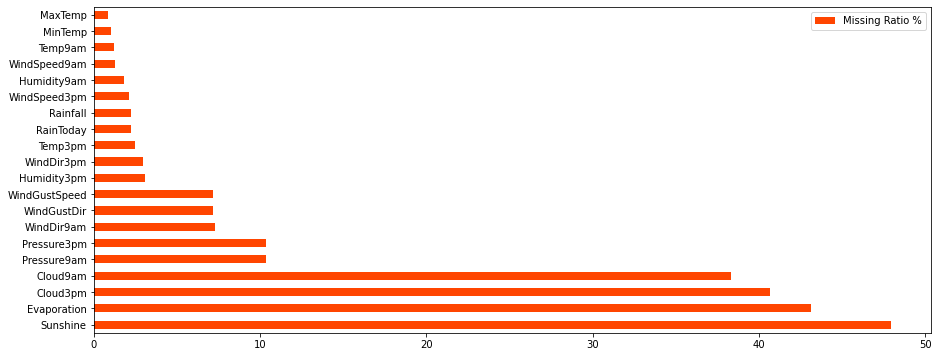

In [294]:
#Creating function for plotting % of null values:

def plot_null_values(data: pd.DataFrame):
    import matplotlib.pyplot as plt
    if data.isnull().sum().sum() != 0:
        Null_perc = (data.isnull().sum() / len(data)) * 100      
        Null_perc = Null_perc.drop(Null_perc[Null_perc == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :Null_perc})
        missing_data.plot(kind = "barh", figsize=(15,6), color='orangered')
        plt.show()
    else:
        print('No NAs/Null Values found')
plot_null_values(w_train)

THere are lot of null values in our datset & some variables contains more than 30% of null values.

As there are lot of null values in our dataset. We have to treat them as internal working of machine learning algorithms breaks down due to null or missing data.
One has to be carefull as treating null vlaues is a tricker task & one may loose important information ot introduce bias in the model.

#### There are multiple ways to treat the null values. Some of them which are commonly use are:
1) Deletion of data: 
   - Row Deletion-->If a particular observation contains more null values (high no of features as null vlaues), it's better     to delete it as it won't be able to learn/draw any specific insight from it.
   - Column Deletion--> If a column/feature contains generally more than 60% null vlaues, drop it.
   
2) Imputation of data: means trying to find a suitable substitute for missing data. Deletion of missing data might lead to loss of information if it is a critical feature or data set itself is very small. 
- Imputation can be done using:
    - mean (for symmetrical data)
    - median (for skewed data)
    - mode (for categorical/Discrete data)
    - Specific Value/one-hot encoding (for large # of missing values)

3) Predicting missing values: In this method we try to apply regression or classification techniques to come up with educated guesses of possible outcome to replace missing value. We have to be careful about not adding any extra bias from our predictive model itsel.

In [295]:
#Dropping null rows if all the columns are Null
w_train = w_train.dropna(axis=0,how='all')
len(w_train)

101822

In [296]:
#Dropping the rows if any row contain than more than 60% null values
w_train = w_train.dropna(axis=0,thresh=14)
len(w_train)

99643

In [297]:
#Dropping rows as per below condition 
# if we have all the wind details missing
w_train = w_train.loc[w_train.WindGustSpeed.notnull() | w_train.WindSpeed9am.notnull() | w_train.WindSpeed3pm.notnull()]
len(w_train)


99578

In [298]:
#Dropping rows as per below condition 
# if we have all the wind direction details missing
w_train = w_train.loc[w_train.WindGustDir.notnull() | w_train.WindDir9am.notnull() | w_train.WindDir3pm.notnull()]
len(w_train)

99343

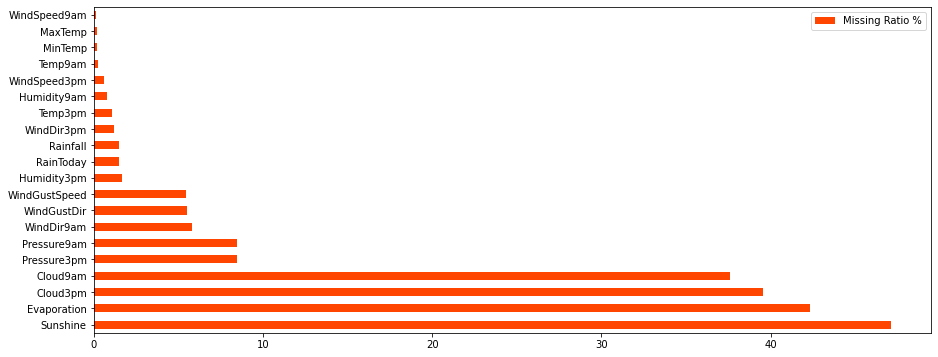

In [299]:
plot_null_values(w_train)

In [300]:
w_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99162.000000,99163.000000,97853.000000,57268.000000,52541.000000,93907.000000,99189.000000,98763.000000,98546.000000,97694.000000,90948.000000,90934.000000,61970.000000,60077.000000,99124.000000,98296.000000,99343.000000
mean,12.220927,23.251681,2.315653,5.469940,7.613412,40.007699,14.106514,18.709810,68.841658,51.495865,1017.648748,1015.257819,4.445990,4.507965,17.000357,21.699489,0.219512
std,6.387130,7.090323,8.150584,4.196556,3.769893,13.574158,8.855668,8.773456,19.003819,20.754798,7.121490,7.045064,2.882218,2.717279,6.486712,6.924716,0.413918
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.900000,28.300000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.500000,0.000000
max,31.900000,48.100000,367.600000,145.000000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1038.500000,9.000000,9.000000,39.400000,46.100000,1.000000


#### Treating Null values

In [301]:
w_train.isna().sum()

Date                 0
Location             0
MinTemp            181
MaxTemp            180
Rainfall          1490
Evaporation      42075
Sunshine         46802
WindGustDir       5448
WindGustSpeed     5436
WindDir9am        5772
WindDir3pm        1183
WindSpeed9am       154
WindSpeed3pm       580
Humidity9am        797
Humidity3pm       1649
Pressure9am       8395
Pressure3pm       8409
Cloud9am         37373
Cloud3pm         39266
Temp9am            219
Temp3pm           1047
RainToday         1490
RainTomorrow         0
dtype: int64

In [302]:
len(w_train)

99343

In [303]:
#Dropping Rain Today col null values
w_train = w_train.loc[w_train.RainToday.notnull()]
w_train.isna().sum()


Date                 0
Location             0
MinTemp            131
MaxTemp            176
Rainfall             0
Evaporation      40858
Sunshine         45781
WindGustDir       5347
WindGustSpeed     5335
WindDir9am        5680
WindDir3pm        1174
WindSpeed9am       121
WindSpeed3pm       577
Humidity9am        772
Humidity3pm       1639
Pressure9am       8354
Pressure3pm       8369
Cloud9am         36360
Cloud3pm         38306
Temp9am            203
Temp3pm           1046
RainToday            0
RainTomorrow         0
dtype: int64

In [304]:
#Filling the missing values for categorical variables with mode
w_train['WindDir9am'] = w_train['WindDir9am'].fillna(w_train['WindDir9am'].mode()[0])
w_train['WindGustDir'] = w_train['WindGustDir'].fillna(w_train['WindGustDir'].mode()[0])
w_train['WindDir3pm'] = w_train['WindDir3pm'].fillna(w_train['WindDir3pm'].mode()[0])

In [305]:
# Sorting the dataset based on location & date in ascending order
# convert to date if it was in str format
#data['Date'] = pd.to_datetime(data['Date'])
w_train = w_train.sort_values(['Location', 'Date'], ascending=(True, True))


In [306]:
# As it's a weather time series data it's better to fill the null values with the previous day values & 
#data doesn't change much in a day
for columns in w_train:
    w_train[columns] = w_train[columns].fillna(method = 'ffill')
print(w_train.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97853 entries, 8439 to 57458
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           97853 non-null  object 
 1   Location       97853 non-null  object 
 2   MinTemp        97853 non-null  float64
 3   MaxTemp        97853 non-null  float64
 4   Rainfall       97853 non-null  float64
 5   Evaporation    97853 non-null  float64
 6   Sunshine       97853 non-null  float64
 7   WindGustDir    97853 non-null  object 
 8   WindGustSpeed  97853 non-null  float64
 9   WindDir9am     97853 non-null  object 
 10  WindDir3pm     97853 non-null  object 
 11  WindSpeed9am   97853 non-null  float64
 12  WindSpeed3pm   97853 non-null  float64
 13  Humidity9am    97853 non-null  float64
 14  Humidity3pm    97853 non-null  float64
 15  Pressure9am    97853 non-null  float64
 16  Pressure3pm    97853 non-null  float64
 17  Cloud9am       95711 non-null  float64
 18  Clo

In [307]:
w_train['Cloud9am'] = w_train['Cloud9am'].fillna(w_train['Cloud9am'].mean())
w_train['Cloud3pm'] = w_train['Cloud3pm'].fillna(w_train['Cloud3pm'].mean())
print(w_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97853 entries, 8439 to 57458
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           97853 non-null  object 
 1   Location       97853 non-null  object 
 2   MinTemp        97853 non-null  float64
 3   MaxTemp        97853 non-null  float64
 4   Rainfall       97853 non-null  float64
 5   Evaporation    97853 non-null  float64
 6   Sunshine       97853 non-null  float64
 7   WindGustDir    97853 non-null  object 
 8   WindGustSpeed  97853 non-null  float64
 9   WindDir9am     97853 non-null  object 
 10  WindDir3pm     97853 non-null  object 
 11  WindSpeed9am   97853 non-null  float64
 12  WindSpeed3pm   97853 non-null  float64
 13  Humidity9am    97853 non-null  float64
 14  Humidity3pm    97853 non-null  float64
 15  Pressure9am    97853 non-null  float64
 16  Pressure3pm    97853 non-null  float64
 17  Cloud9am       97853 non-null  float64
 18  Clo

##### Now we have treated all the null values in the dataset & this data can be used for further analytics

In [308]:
#Changing RainToday data type to numeric
w_train['RainToday'] = w_train['RainToday'].map({'Yes': 1, 'No': 0})

#### Assumptions
1) For more cloud cover there are possibility of rain.

2) High Temp will lead to high Evaporation & High Evaporation lead less humiidity.

3) Temp should not have any significant effect on rainfall.

4) Higher the rainfall today, more the chances of rain for tomorrow.

5) Less Sunshine might lead to rainfall.

#### To check the count of Rain yes & no for Today & tomorrow rainfall

In [309]:
w_train['RainTomorrow'].value_counts()

#its a imbalanced data

0    76450
1    21403
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

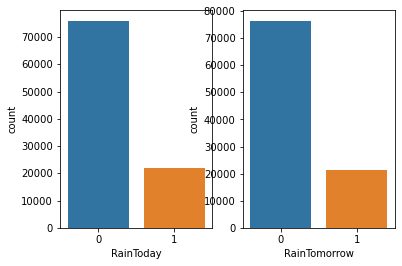

In [310]:
fig,ax =plt.subplots(1,2)
sns.countplot(data=w_train,x='RainToday',ax=ax[0])
sns.countplot(data=w_train,x='RainTomorrow',ax=ax[1])

The dataset is clearly imbalanced for response variable i.e. Rain Tomorrow:(0:77536 & 1:21807)

### This is clearly imbalanced dataset with a ratio of Yes:No as 20:80 approx

#### To check the count of Wind Direction Categorical data

In [311]:
w_train['WindDir9am'].value_counts(),w_train['WindDir3pm'].value_counts(),w_train['WindGustDir'].value_counts()

(N      13708
 SE      6412
 E       6318
 SSE     6237
 S       6023
 NW      5930
 W       5746
 SW      5672
 NNE     5496
 NNW     5467
 ESE     5328
 ENE     5325
 SSW     5188
 NE      5136
 WNW     5062
 WSW     4805
 Name: WindDir9am, dtype: int64,
 SE     8663
 W      6870
 S      6690
 WSW    6476
 SW     6416
 SSE    6388
 WNW    6131
 N      6016
 NW     5947
 ESE    5897
 E      5796
 NE     5722
 SSW    5573
 NNW    5398
 ENE    5332
 NNE    4538
 Name: WindDir3pm, dtype: int64,
 W      12178
 SE      6509
 N       6315
 E       6306
 SSE     6296
 WSW     6209
 S       6179
 SW      6093
 SSW     6009
 WNW     5665
 NW      5582
 ENE     5558
 ESE     5042
 NE      4885
 NNW     4541
 NNE     4486
 Name: WindGustDir, dtype: int64)

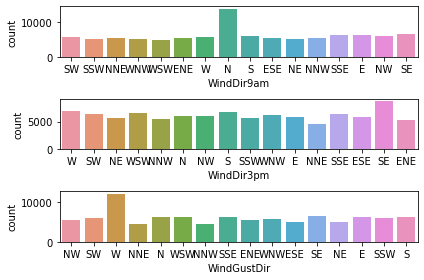

In [312]:
fig, ax =plt.subplots(3,1)
sns.countplot(data=w_train,x='WindDir9am',ax=ax[0])
sns.countplot(data=w_train,x='WindDir3pm',ax=ax[1])
sns.countplot(data=w_train,x='WindGustDir',ax=ax[2])
fig.tight_layout()

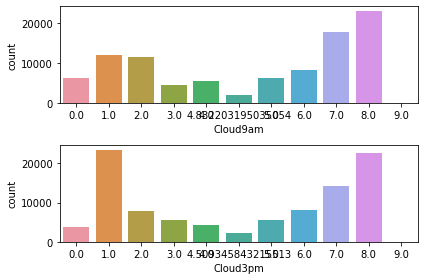

In [313]:
#Ploting cloud data
fig,ax =plt.subplots(2,1)
sns.countplot(data=w_train,x='Cloud9am',ax=ax[0])
sns.countplot(data=w_train,x='Cloud3pm',ax=ax[1])
fig.tight_layout()

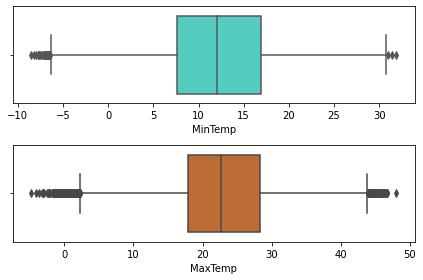

In [314]:
#Ploting min & max temp data
fig,ax =plt.subplots(2,1)
sns.boxplot(data=w_train,x='MinTemp',ax=ax[0],color='turquoise')
sns.boxplot(data=w_train,x='MaxTemp',ax=ax[1],color='chocolate')
fig.tight_layout()

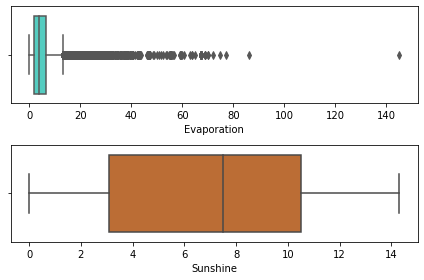

In [315]:
#Ploting Evaporation & Sunshine data
fig,ax =plt.subplots(2,1)
sns.boxplot(data=w_train,x='Evaporation',ax=ax[0],color='turquoise')
sns.boxplot(data=w_train,x='Sunshine',ax=ax[1],color='chocolate')
fig.tight_layout()

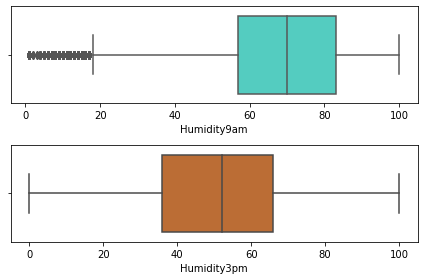

In [316]:
#Ploting Humidity Data
fig,ax =plt.subplots(2,1)
sns.boxplot(data=w_train,x='Humidity9am',ax=ax[0],color='turquoise')
sns.boxplot(data=w_train,x='Humidity3pm',ax=ax[1],color='chocolate')
fig.tight_layout()

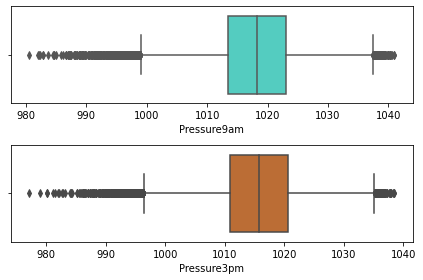

In [317]:
#Ploting Pressure data
fig,ax =plt.subplots(2,1)
sns.boxplot(data=w_train,x='Pressure9am',ax=ax[0],color='turquoise')
sns.boxplot(data=w_train,x='Pressure3pm',ax=ax[1],color='chocolate')
fig.tight_layout()

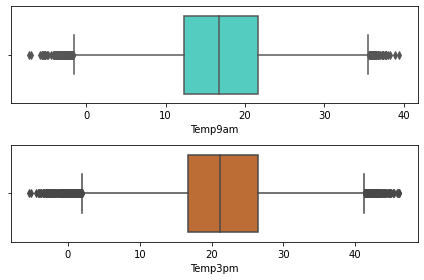

In [318]:
#Ploting Temp data
fig,ax =plt.subplots(2,1)
sns.boxplot(data=w_train,x='Temp9am',ax=ax[0],color='turquoise')
sns.boxplot(data=w_train,x='Temp3pm',ax=ax[1],color='chocolate')
fig.tight_layout()

#### Analysing Numerical Features

In [319]:
#lets get the list of Nuemrical feature column list
num_cols = w_train.select_dtypes('number').columns.to_list()
print(num_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


<AxesSubplot:>

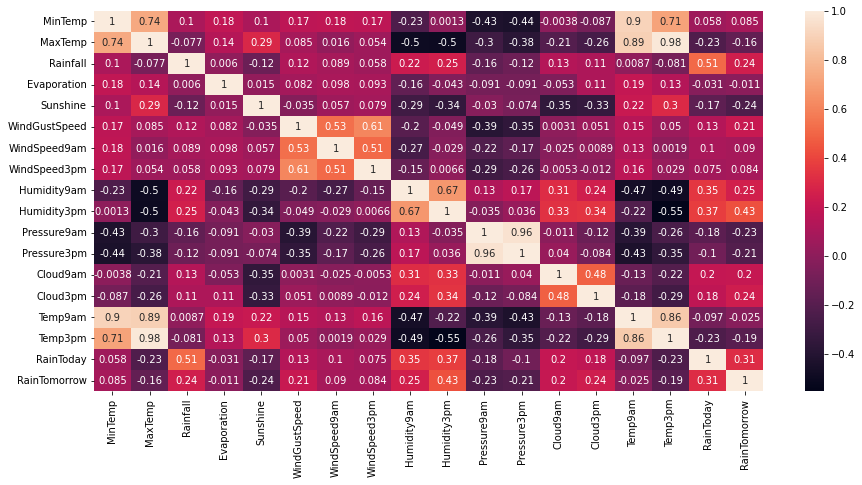

In [320]:
#ploting heatmap for getting correlation
plt.figure(figsize=(15,7))
sns.heatmap(w_train[num_cols].corr(), annot=True)

In [321]:
# to get the num variables who are having high correlation
threshold=0.60
corr_col=[]
for i in num_cols:
    for j in num_cols:
        if i == j:
            continue
        if w_train[[i,j]].corr()[i][1] >= threshold:
            print("{} is highly coorelated with {} at {:.2f}".format(i,j,w_train[[i,j]].corr()[i][1] ))
            

MinTemp is highly coorelated with MaxTemp at 0.74
MinTemp is highly coorelated with Temp9am at 0.90
MinTemp is highly coorelated with Temp3pm at 0.71
MaxTemp is highly coorelated with MinTemp at 0.74
MaxTemp is highly coorelated with Temp9am at 0.89
MaxTemp is highly coorelated with Temp3pm at 0.98
WindGustSpeed is highly coorelated with WindSpeed3pm at 0.61
WindSpeed3pm is highly coorelated with WindGustSpeed at 0.61
Humidity9am is highly coorelated with Humidity3pm at 0.67
Humidity3pm is highly coorelated with Humidity9am at 0.67
Pressure9am is highly coorelated with Pressure3pm at 0.96
Pressure3pm is highly coorelated with Pressure9am at 0.96
Temp9am is highly coorelated with MinTemp at 0.90
Temp9am is highly coorelated with MaxTemp at 0.89
Temp9am is highly coorelated with Temp3pm at 0.86
Temp3pm is highly coorelated with MinTemp at 0.71
Temp3pm is highly coorelated with MaxTemp at 0.98
Temp3pm is highly coorelated with Temp9am at 0.86


As we are using only Decison tree model for this dataset. It's not necessary to treat the outliers & multicollinearity between independent variable. Hence we will proceed for training now.

In [322]:
#from sklearn import preprocessing
#W_train=w_train.copy()

le = preprocessing.LabelEncoder()
W_train['Location'] = le.fit_transform(W_train['Location'])
W_train['WindDir9am'] = le.fit_transform(W_train['WindDir9am'])
W_train['WindDir3pm'] = le.fit_transform(W_train['WindDir3pm'])
W_train['WindGustDir'] = le.fit_transform(W_train['WindGustDir'])

In [323]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [324]:
# Extracting month from date
w_train['month'] = pd.to_datetime(w_train['Date']).dt.month

In [325]:
W_train = w_train.drop(['Date'],axis=1)
W_train = pd.get_dummies(W_train)
W_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
8439,8.8,15.7,5.0,1.6,2.6,48.0,13.0,15.0,92.0,67.0,...,0,0,0,0,0,0,0,1,0,0
629,12.7,15.8,0.8,1.4,7.8,35.0,13.0,15.0,75.0,52.0,...,0,0,0,0,0,0,1,0,0,0
25669,6.2,15.1,0.0,1.8,2.1,20.0,2.0,11.0,81.0,56.0,...,0,0,0,0,0,0,1,0,0,0
71740,5.3,15.9,0.0,1.4,8.0,30.0,6.0,13.0,71.0,46.0,...,0,0,0,0,0,0,0,0,0,0
94710,9.8,15.4,0.0,1.4,0.9,30.0,9.0,9.0,56.0,67.0,...,0,0,0,0,0,0,0,0,0,0


In [326]:
x_train = W_train.drop(['RainTomorrow'],axis=1)
y_train = W_train["RainTomorrow"]
x_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
8439,8.8,15.7,5.0,1.6,2.6,48.0,13.0,15.0,92.0,67.0,...,0,0,0,0,0,0,0,1,0,0
629,12.7,15.8,0.8,1.4,7.8,35.0,13.0,15.0,75.0,52.0,...,0,0,0,0,0,0,1,0,0,0
25669,6.2,15.1,0.0,1.8,2.1,20.0,2.0,11.0,81.0,56.0,...,0,0,0,0,0,0,1,0,0,0
71740,5.3,15.9,0.0,1.4,8.0,30.0,6.0,13.0,71.0,46.0,...,0,0,0,0,0,0,0,0,0,0
94710,9.8,15.4,0.0,1.4,0.9,30.0,9.0,9.0,56.0,67.0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
x_train.columns.value_counts()

MinTemp               1
WindDir9am_N          1
WindDir9am_ENE        1
WindDir9am_E          1
WindGustDir_WSW       1
                     ..
Location_Katherine    1
Location_Hobart       1
Location_GoldCoast    1
Location_Darwin       1
WindDir3pm_WSW        1
Length: 115, dtype: int64

In [328]:
# splitting the train data into train & validation
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size =0.25, random_state=50)

In [329]:
x_train.columns[x_train.isna().sum()>0]

Index([], dtype='object')

In [330]:
count = Counter(y_train)
count

Counter({1: 16019, 0: 57370})

In [331]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Model Building with Imbalanced datset

In [332]:
Depth = np.arange(1,20)
Recall = []
F1_score =[]
for d in Depth:
    # define parameters
    model = DecisionTreeClassifier(criterion = "gini", max_depth=d)
    # fit model on training data
    model.fit(x_train, y_train)
    # prediction of y on validation data
    y_pred = model.predict(x_valid)
    
    Recall.append(recall_score(y_valid, y_pred))
    F1_score.append(f1_score(y_valid, y_pred))

print ('Recall:\n',Recall)
print('F1_score:\n',F1_score)

print ("Max Recall:", max(Recall),"\n Max F1 Score",max(F1_score))

Recall:
 [0.5395616641901931, 0.21972511144130757, 0.37481426448737, 0.5098439821693908, 0.43945022288261515, 0.47065378900445765, 0.45820950965824664, 0.46396731054977713, 0.47901188707280834, 0.4825408618127786, 0.4914561664190193, 0.5092867756315007, 0.49944279346210996, 0.5016716196136701, 0.5111441307578009, 0.5150445765230312, 0.5094725111441307, 0.5217310549777118, 0.5143016344725111]
F1_score:
 [0.5507631055076312, 0.3470225872689939, 0.4962498463051764, 0.5721133805752397, 0.5510655642249913, 0.572138180176112, 0.5647247338903514, 0.5651583710407241, 0.5696929533907665, 0.571994715984148, 0.5689710783786689, 0.5746620559572461, 0.5614364756237603, 0.5569072164948453, 0.5577624645318201, 0.5523354247584902, 0.5452738296392009, 0.5502448579823702, 0.5377743251116721]
Max Recall: 0.5395616641901931 
 Max F1 Score 0.5746620559572461


In [333]:
# best depth is 9
# define parameters
model = DecisionTreeClassifier(criterion = "gini", max_depth=9, min_samples_leaf = 250)
# fit model on training data
model.fit(x_train, y_train)
# prediction of y on validation data
y_pred = model.predict(x_valid)
ytrain_pred = model.predict(x_train)
    
print("Test Recall", recall_score(y_valid, y_pred))
print("Test F1_score",f1_score(y_valid, y_pred))
print("AUROC: ", roc_auc_score(y_valid, y_pred))

Test Recall 0.4823551263001486
Test F1_score 0.5745575221238938
AUROC:  0.7134259908230304


In [334]:
# Random - Forest model fitting

rf = RandomForestClassifier()
#fitting model
rf.fit(x_train, y_train)
#Calculating error metric on validation
y_pred = rf.predict(x_valid)
ytrain_pred = rf.predict(x_train)
    
print("Test Recall", recall_score(y_valid, y_pred))
print("Test F1_score",f1_score(y_valid, y_pred))
print("Test AUROC: ", roc_auc_score(y_valid, y_pred))

Test Recall 0.487369985141159
Test F1_score 0.6005263760155625
Test AUROC:  0.7245288080842064


In [335]:
# Logistic Regression Model fitting

log_reg = LogisticRegression()
# fit model on training data
log_reg.fit(x_train, y_train)
# prediction of y on validation data
y_pred = log_reg.predict(x_valid)
ytrain_pred = log_reg.predict(x_train)
    
print("Test Recall", recall_score(y_valid, y_pred))
print("Test F1_score",f1_score(y_valid, y_pred))
print("AUROC: ", roc_auc_score(y_valid, y_pred))

Test Recall 0.45709509658246655
Test F1_score 0.5565984394436277
AUROC:  0.7023945084589481


### Model Building with Balanced datset

In [336]:
#Balancing data
#to balance the training dataset 
os = SMOTE(random_state=50) #defined random state
Xb_train, Yb_train = os.fit_resample(x_train, y_train)
count = Counter(Yb_train)
print(count)


Counter({1: 57370, 0: 57370})


In [337]:
Depth = np.arange(1,20)
Recall = []
F1_score =[]
for d in Depth:
    # define parameters
    model = DecisionTreeClassifier(criterion = "gini", max_depth=d)
    # fit model on training data
    model.fit(Xb_train, Yb_train)
    # prediction of y on validation data
    y_pred = model.predict(x_valid)
    
    Recall.append(recall_score(y_valid, y_pred))
    F1_score.append(f1_score(y_valid, y_pred))

print ('Recall:\n',Recall)
print('F1_score:\n',F1_score)

print ("Max Recall:", max(Recall),"\n Max F1 Score",max(F1_score))

Recall:
 [0.6145988112927192, 0.788075780089153, 0.4962852897473997, 0.6638187221396731, 0.6539747399702823, 0.6422734026745914, 0.6563893016344725, 0.6578751857355126, 0.6612184249628529, 0.6417161961367014, 0.6339153046062407, 0.6368870728083209, 0.6183135215453195, 0.612369985141159, 0.6145988112927192, 0.5984398216939079, 0.5910104011887073, 0.587667161961367, 0.5859955423476969]
F1_score:
 [0.554317782058799, 0.5099146737171013, 0.5425931566656513, 0.5759871071716357, 0.572520325203252, 0.5755659121171771, 0.5818720671770807, 0.5776255707762558, 0.5756326299620018, 0.5722567287784679, 0.5790143353974043, 0.5798596431893125, 0.5746094761370502, 0.5730922996697375, 0.5695843015750065, 0.5568613895610093, 0.5490466741437321, 0.5458937198067634, 0.544857956998532]
Max Recall: 0.788075780089153 
 Max F1 Score 0.5818720671770807


In [338]:
# best depth is 9
# define parameters
model = DecisionTreeClassifier(criterion = "gini", max_depth=9)
# fit model on training data
model.fit(Xb_train, Yb_train)
# prediction of y on validation data
y_pred = model.predict(x_valid)
ytrain_pred = model.predict(Xb_train)
    
print("Test Recall", recall_score(y_valid, y_pred))
print("Test F1_score",f1_score(y_valid, y_pred))
print("AUROC: ", roc_auc_score(y_valid, y_pred))

Test Recall 0.6612184249628529
Test F1_score 0.5756326299620018
AUROC:  0.7408555437183236


In [339]:
# Random - Forest model fitting

rf = RandomForestClassifier()
#fitting model
rf.fit(Xb_train, Yb_train)
#Calculating error metric on validation
y_pred = rf.predict(x_valid)
ytrain_pred = rf.predict(Xb_train)
    
print("Test Recall", recall_score(y_valid, y_pred))
print("Test F1_score",f1_score(y_valid, y_pred))
print("AUROC: ", roc_auc_score(y_valid, y_pred))

Test Recall 0.5861812778603269
Test F1_score 0.6368038740920097
AUROC:  0.7571367605234549


In [340]:
# Logistic Regression Model fitting

log_reg = LogisticRegression()
# fit model on training data
log_reg.fit(Xb_train, Yb_train)
# prediction of y on validation data
y_pred = log_reg.predict(x_valid)
ytrain_pred = log_reg.predict(Xb_train)
    
print("Test Recall", recall_score(y_valid, y_pred))
print("Test F1_score",f1_score(y_valid, y_pred))
print("AUROC: ", roc_auc_score(y_valid, y_pred))

Test Recall 0.7585438335809807
Test F1_score 0.5849326840446863
AUROC:  0.7614522102915384


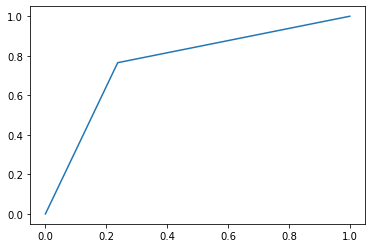

In [341]:

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Yb_train, ytrain_pred)

#create ROC curve
plt.plot(fpr,tpr)

### Features selection using IV

In [342]:
def iv_woe(data, target, bins=10, show_woe=False):
    c=[]
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        if d['IV'].sum()<0.03:
            c.append(ivars)
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
        
    return c,newDF, woeDF

In [343]:
iv_woe(W_train, 'RainTomorrow' , bins=10, show_woe=False)

Information value of MinTemp is 0.061553
Information value of MaxTemp is 0.153892
Information value of Rainfall is 0.598191
Information value of Evaporation is 0.036652
Information value of Sunshine is 0.446371
Information value of WindGustSpeed is 0.2486
Information value of WindSpeed9am is 0.041797
Information value of WindSpeed3pm is 0.047749
Information value of Humidity9am is 0.438916
Information value of Humidity3pm is 1.293197
Information value of Pressure9am is 0.315645
Information value of Pressure3pm is 0.266866
Information value of Cloud9am is 0.327036
Information value of Cloud3pm is 0.364052
Information value of Temp9am is 0.013157
Information value of Temp3pm is 0.226716
Information value of RainToday is 0.493945
Information value of month is 0.017655
Information value of Location_Adelaide is 7e-06
Information value of Location_Albany is 0.004623
Information value of Location_Albury is 1.6e-05
Information value of Location_AliceSprings is 0.020116
Information value of Loc

(['Temp9am',
  'month',
  'Location_Adelaide',
  'Location_Albany',
  'Location_Albury',
  'Location_AliceSprings',
  'Location_BadgerysCreek',
  'Location_Ballarat',
  'Location_Bendigo',
  'Location_Brisbane',
  'Location_Cairns',
  'Location_Canberra',
  'Location_Cobar',
  'Location_CoffsHarbour',
  'Location_Dartmoor',
  'Location_Darwin',
  'Location_GoldCoast',
  'Location_Hobart',
  'Location_Katherine',
  'Location_Launceston',
  'Location_Melbourne',
  'Location_MelbourneAirport',
  'Location_Mildura',
  'Location_Moree',
  'Location_MountGambier',
  'Location_MountGinini',
  'Location_Newcastle',
  'Location_Nhil',
  'Location_NorahHead',
  'Location_NorfolkIsland',
  'Location_Nuriootpa',
  'Location_PearceRAAF',
  'Location_Penrith',
  'Location_Perth',
  'Location_PerthAirport',
  'Location_Portland',
  'Location_Richmond',
  'Location_Sale',
  'Location_SalmonGums',
  'Location_Sydney',
  'Location_SydneyAirport',
  'Location_Townsville',
  'Location_Tuggeranong',
  'Loc

In [344]:
X_train = Xb_train
Y_train = Yb_train
X_train = X_train.drop(['Temp9am',
  'Location_Adelaide',
  'Location_Albany',
  'Location_Albury',
  'Location_AliceSprings',
  'Location_BadgerysCreek',
  'Location_Ballarat',
  'Location_Bendigo',
  'Location_Brisbane',
  'Location_Cairns',
  'Location_Canberra',
  'Location_Cobar',
  'Location_CoffsHarbour',
  'Location_Dartmoor',
  'Location_Darwin',
  'Location_GoldCoast',
  'Location_Hobart',
  'Location_Katherine',
  'Location_Launceston',
  'Location_Melbourne',
  'Location_MelbourneAirport',
  'Location_Mildura',
  'Location_Moree',
  'Location_MountGambier',
  'Location_MountGinini',
  'Location_Newcastle',
  'Location_Nhil',
  'Location_NorahHead',
  'Location_NorfolkIsland',
  'Location_Nuriootpa',
  'Location_PearceRAAF',
  'Location_Penrith',
  'Location_Perth',
  'Location_PerthAirport',
  'Location_Portland',
  'Location_Richmond',
  'Location_Sale',
  'Location_SalmonGums',
  'Location_Sydney',
  'Location_SydneyAirport',
  'Location_Townsville',
  'Location_Tuggeranong',
  'Location_Uluru',
  'Location_WaggaWagga',
  'Location_Walpole',
  'Location_Watsonia',
  'Location_Williamtown',
  'Location_Witchcliffe',
  'Location_Wollongong',
  'Location_Woomera',
  'WindGustDir_E',
  'WindGustDir_ENE',
  'WindGustDir_ESE',
  'WindGustDir_N',
  'WindGustDir_NE',
  'WindGustDir_NNE',
  'WindGustDir_NNW',
  'WindGustDir_NW',
  'WindGustDir_S',
  'WindGustDir_SE',
  'WindGustDir_SSE',
  'WindGustDir_SSW',
  'WindGustDir_SW',
  'WindGustDir_W',
  'WindGustDir_WNW',
  'WindGustDir_WSW',
  'WindDir9am_E',
  'WindDir9am_ENE',
  'WindDir9am_ESE',
  'WindDir9am_N',
  'WindDir9am_NE',
  'WindDir9am_NNE',
  'WindDir9am_NNW',
  'WindDir9am_NW',
  'WindDir9am_S',
  'WindDir9am_SE',
  'WindDir9am_SSE',
  'WindDir9am_SSW',
  'WindDir9am_SW',
  'WindDir9am_W',
  'WindDir9am_WNW',
  'WindDir9am_WSW',
  'WindDir3pm_E',
  'WindDir3pm_ENE',
  'WindDir3pm_ESE',
  'WindDir3pm_N',
  'WindDir3pm_NE',
  'WindDir3pm_NNE',
  'WindDir3pm_NNW',
  'WindDir3pm_NW',
  'WindDir3pm_S',
  'WindDir3pm_SE',
  'WindDir3pm_SSE',
  'WindDir3pm_SSW',
  'WindDir3pm_SW',
  'WindDir3pm_W',
  'WindDir3pm_WNW',
  'WindDir3pm_WSW'],axis=1)
x_valid=x_valid.drop(['Temp9am',
  'Location_Adelaide',
  'Location_Albany',
  'Location_Albury',
  'Location_AliceSprings',
  'Location_BadgerysCreek',
  'Location_Ballarat',
  'Location_Bendigo',
  'Location_Brisbane',
  'Location_Cairns',
  'Location_Canberra',
  'Location_Cobar',
  'Location_CoffsHarbour',
  'Location_Dartmoor',
  'Location_Darwin',
  'Location_GoldCoast',
  'Location_Hobart',
  'Location_Katherine',
  'Location_Launceston',
  'Location_Melbourne',
  'Location_MelbourneAirport',
  'Location_Mildura',
  'Location_Moree',
  'Location_MountGambier',
  'Location_MountGinini',
  'Location_Newcastle',
  'Location_Nhil',
  'Location_NorahHead',
  'Location_NorfolkIsland',
  'Location_Nuriootpa',
  'Location_PearceRAAF',
  'Location_Penrith',
  'Location_Perth',
  'Location_PerthAirport',
  'Location_Portland',
  'Location_Richmond',
  'Location_Sale',
  'Location_SalmonGums',
  'Location_Sydney',
  'Location_SydneyAirport',
  'Location_Townsville',
  'Location_Tuggeranong',
  'Location_Uluru',
  'Location_WaggaWagga',
  'Location_Walpole',
  'Location_Watsonia',
  'Location_Williamtown',
  'Location_Witchcliffe',
  'Location_Wollongong',
  'Location_Woomera',
  'WindGustDir_E',
  'WindGustDir_ENE',
  'WindGustDir_ESE',
  'WindGustDir_N',
  'WindGustDir_NE',
  'WindGustDir_NNE',
  'WindGustDir_NNW',
  'WindGustDir_NW',
  'WindGustDir_S',
  'WindGustDir_SE',
  'WindGustDir_SSE',
  'WindGustDir_SSW',
  'WindGustDir_SW',
  'WindGustDir_W',
  'WindGustDir_WNW',
  'WindGustDir_WSW',
  'WindDir9am_E',
  'WindDir9am_ENE',
  'WindDir9am_ESE',
  'WindDir9am_N',
  'WindDir9am_NE',
  'WindDir9am_NNE',
  'WindDir9am_NNW',
  'WindDir9am_NW',
  'WindDir9am_S',
  'WindDir9am_SE',
  'WindDir9am_SSE',
  'WindDir9am_SSW',
  'WindDir9am_SW',
  'WindDir9am_W',
  'WindDir9am_WNW',
  'WindDir9am_WSW',
  'WindDir3pm_E',
  'WindDir3pm_ENE',
  'WindDir3pm_ESE',
  'WindDir3pm_N',
  'WindDir3pm_NE',
  'WindDir3pm_NNE',
  'WindDir3pm_NNW',
  'WindDir3pm_NW',
  'WindDir3pm_S',
  'WindDir3pm_SE',
  'WindDir3pm_SSE',
  'WindDir3pm_SSW',
  'WindDir3pm_SW',
  'WindDir3pm_W',
  'WindDir3pm_WNW',
  'WindDir3pm_WSW'],axis=1)

#### Dropping Multicollinearity for Logistic Regression Using VIF

In [345]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('RainTomorrow ~  MaxTemp+ Rainfall+ Evaporation+ Sunshine+ WindGustSpeed+WindSpeed9am+ WindSpeed3pm+ Humidity9am+ Humidity3pm+Pressure9am+Pressure3pm+Cloud9am+Cloud3pm+Temp3pm+RainToday+MinTemp', data=pd.concat([X_train,Y_train],axis=1), return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,30073.396066,Intercept
1,34.599825,MaxTemp
2,1.424306,Rainfall
3,1.095717,Evaporation
4,1.343539,Sunshine
5,2.039065,WindGustSpeed
6,1.826166,WindSpeed9am
7,1.858627,WindSpeed3pm
8,2.622542,Humidity9am
9,4.803143,Humidity3pm


In [346]:
X_train=X_train.drop(['MaxTemp','Pressure3pm','MinTemp','Humidity9am'],axis=1)
x_valid=x_valid.drop(['MaxTemp','Pressure3pm','MinTemp','Humidity9am'],axis=1)

In [347]:
# Logistic Regression Model fitting

log_reg = LogisticRegression()
# fit model on training data
log_reg.fit(X_train, Y_train)
# prediction of y on validation data
y_pred = log_reg.predict(x_valid)
    
print("Test Recall", recall_score(y_valid, y_pred))
print("Test F1_score",f1_score(y_valid, y_pred))
print("AUROC: ", roc_auc_score(y_valid, y_pred))

Test Recall 0.75037147102526
Test F1_score 0.5860593312540799
AUROC:  0.7608513539612674


### Logistic regression model has best performance in this case 

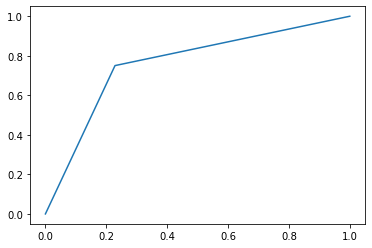

In [348]:

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_valid, y_pred)

#create ROC curve
plt.plot(fpr,tpr)

In [349]:
for i in [0.4,0.42,0.44,0.46,0.48,0.5,0.52,0.54,0.56,0.58,0.6]:
    THRESHOLD = i
    preds = np.where(log_reg.predict_proba(x_valid)[:,1] > THRESHOLD, 1, 0)
    print(f"Test Recall for ({i}) threshold =", recall_score(y_valid, preds))
    print("Test F1_score=",f1_score(y_valid, preds))
    print("Test precision score=",precision_score(y_valid, preds),'\n')

Test Recall for (0.4) threshold = 0.8345096582466568
Test F1_score= 0.5600149569986289
Test precision score= 0.42140311386231477 

Test Recall for (0.42) threshold = 0.8202080237741456
Test F1_score= 0.567099011172467
Test precision score= 0.4333660451422964 

Test Recall for (0.44) threshold = 0.799591381872214
Test F1_score= 0.5706521739130433
Test precision score= 0.44363149216817804 

Test Recall for (0.46) threshold = 0.7864041604754829
Test F1_score= 0.5777838427947598
Test precision score= 0.45664365832614323 

Test Recall for (0.48) threshold = 0.7670876671619614
Test F1_score= 0.5805862093203065
Test precision score= 0.4670360737306344 

Test Recall for (0.5) threshold = 0.75037147102526
Test F1_score= 0.5860593312540799
Test precision score= 0.4807806735689635 

Test Recall for (0.52) threshold = 0.7349554234769688
Test F1_score= 0.5916566985645934
Test precision score= 0.49512012012012013 

Test Recall for (0.54) threshold = 0.7174962852897474
Test F1_score= 0.59715566548152